In [1]:
#link Train dataset: https://www.kaggle.com/datasets/cf77495622971312010dd5934ee91f07ccbcfdea8e2f7778977ea8485c1914df

In [2]:
#import module

from Train_data import augs, img_de_normalize
from visualize import imshow_img_mask, visualize_distribute_dataset
from custom_dataset import ImageDataset
# from utils import transfms_M_STD, compute_mean_std
#import lib
import pandas as pd
import albumentations  as A
from albumentations.pytorch.transforms import ToTensorV2
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm

/home/trucloan/anaconda3/envs/myenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# data_dir = './COVID_QU_Ex_dataset'
lung_data = '/mnt/ca39154e-4274-4299-9720-afdef386cdc3/covid19_resnet152_python-main/archive_14gb/COVID_QU_Ex/Lung Segmentation Data/Lung Segmentation Data/'

In [4]:
# tao dict với key = file_name, value = label
label = os.listdir(lung_data+'Train')
dict_img = {}
for lbl in label:
    for file_name in os.listdir(lung_data+'Train/' +lbl +'/images'):
        dict_img[file_name]=lbl
dict_img

{'non_COVID (2869).png': 'Non-COVID',
 'non_COVID (8492).png': 'Non-COVID',
 'non_COVID (8910).png': 'Non-COVID',
 'non_COVID (2237).png': 'Non-COVID',
 'non_COVID (1866).png': 'Non-COVID',
 'non_COVID (9852).png': 'Non-COVID',
 'non_COVID (6186).png': 'Non-COVID',
 'non_COVID (9581).png': 'Non-COVID',
 'non_COVID (9082).png': 'Non-COVID',
 'non_COVID (6514).png': 'Non-COVID',
 'non_COVID (6247).png': 'Non-COVID',
 'non_COVID (3085).png': 'Non-COVID',
 'non_COVID (8358).png': 'Non-COVID',
 'non_COVID (8060).png': 'Non-COVID',
 'non_COVID (9796).png': 'Non-COVID',
 'non_COVID (9095).png': 'Non-COVID',
 'non_COVID (7116).png': 'Non-COVID',
 'non_COVID (8510).png': 'Non-COVID',
 'non_COVID (1147).png': 'Non-COVID',
 'non_COVID (2762).png': 'Non-COVID',
 'non_COVID (10537).png': 'Non-COVID',
 'non_COVID (1105).png': 'Non-COVID',
 'non_COVID (8882).png': 'Non-COVID',
 'non_COVID (8706).png': 'Non-COVID',
 'non_COVID (6775).png': 'Non-COVID',
 'non_COVID (3214).png': 'Non-COVID',
 'non_COVID

In [5]:
train_df1 = pd.DataFrame(dict_img.items(), columns=['file_names', 'lables'])

train_df1

,file_names,lables
0,non_COVID (2869).png,Non-COVID
1,non_COVID (8492).png,Non-COVID
2,non_COVID (8910).png,Non-COVID
3,non_COVID (2237).png,Non-COVID
4,non_COVID (1866).png,Non-COVID
...,...,...
21710,Normal (10669).png,Normal
21711,Normal (5903).png,Normal
21712,Normal (4890).png,Normal
21713,Normal (5207).png,Normal


In [6]:
# tao danh sach chua file_name image va label
def create_list(path_folder):
    label = os.listdir(path_folder)
    img_label_list =[]
    for lbl in label:
        list_file_name = os.listdir(path_folder +lbl +'/images')
        img_label_list+=[(file_name, lbl) for file_name in list_file_name] # https://www.stackvidhya.com/concatenate-lists-in-python/#:~:text=You%20can%20concatenate%20multiple%20lists,single%20list%20in%20one%20shot
    return img_label_list

In [7]:
train_list = create_list(lung_data+'Train/')
val_list = create_list(lung_data+'Val/')
test_list = create_list(lung_data+'Test/')

In [8]:
#tao table (dataframe) để lưu img_label_list
train_df = pd.DataFrame(train_list, columns = ['file_name', 'label'])
val_df = pd.DataFrame(val_list, columns = ['file_name', 'label'])
test_df = pd.DataFrame(test_list, columns = ['file_name', 'label'])

In [9]:
# ghi file csv 
train_df.to_csv(lung_data+'train.csv',header=True, index = False) #ghi file csv, header = column name, if index = True then add 1 columns
val_df.to_csv(lung_data+'val.csv',header=True, index = False)
test_df.to_csv(lung_data+'test.csv',header=True, index = False)

In [10]:
# doc file csv
train_csv = pd.read_csv(lung_data+'train.csv') # doc file csv
val_csv = pd.read_csv(lung_data+'val.csv') # doc file csv
test_csv = pd.read_csv(lung_data+'test.csv') # doc file csv

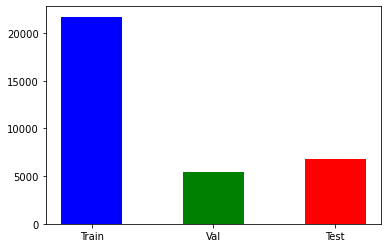

(21715, 5417, 6788)

In [11]:
# ve phan bo data tren train, val, test
# https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

len_train , len_val, len_test = len(train_csv), len(val_csv), len(test_csv)

# print(len_train , len_val, len_test)
x = ['Train', 'Val', 'Test']
y = [len_train, len_val, len_test]
plt.bar(x, y, color = ['b', 'g', 'r'], width=0.5)
plt.show()
len(train_csv), len(val_csv), len(test_csv)

In [12]:
# dem so luong cac class trong train_csv
# https://re-thought.com/pandas-value_counts/#:~:text=The%20value_counts%20%28%29%20function%20is%20used%20to%20get,the%20first%20element%20is%20the%20most%20frequently-occurring%20element.

lst_train = list(train_csv['label'].value_counts())
lst_val = list(val_csv['label'].value_counts())
lst_test = list(test_csv['label'].value_counts())


In [13]:
test_csv['label'].value_counts()

COVID-19     2395
Non-COVID    2253
Normal       2140
Name: label, dtype: int64

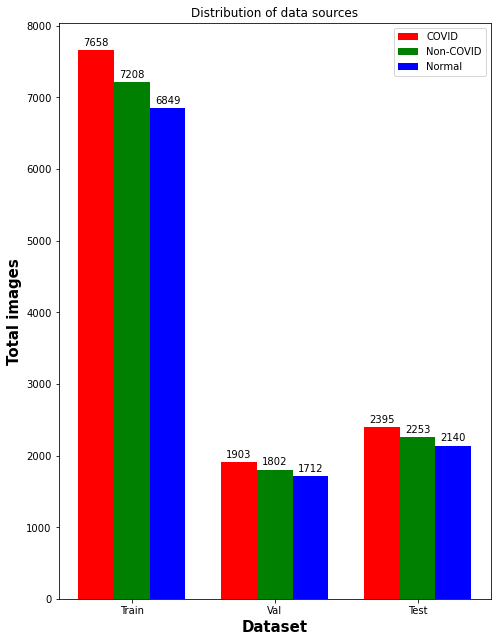

In [14]:
visualize_distribute_dataset(lst_train, lst_val, lst_test)

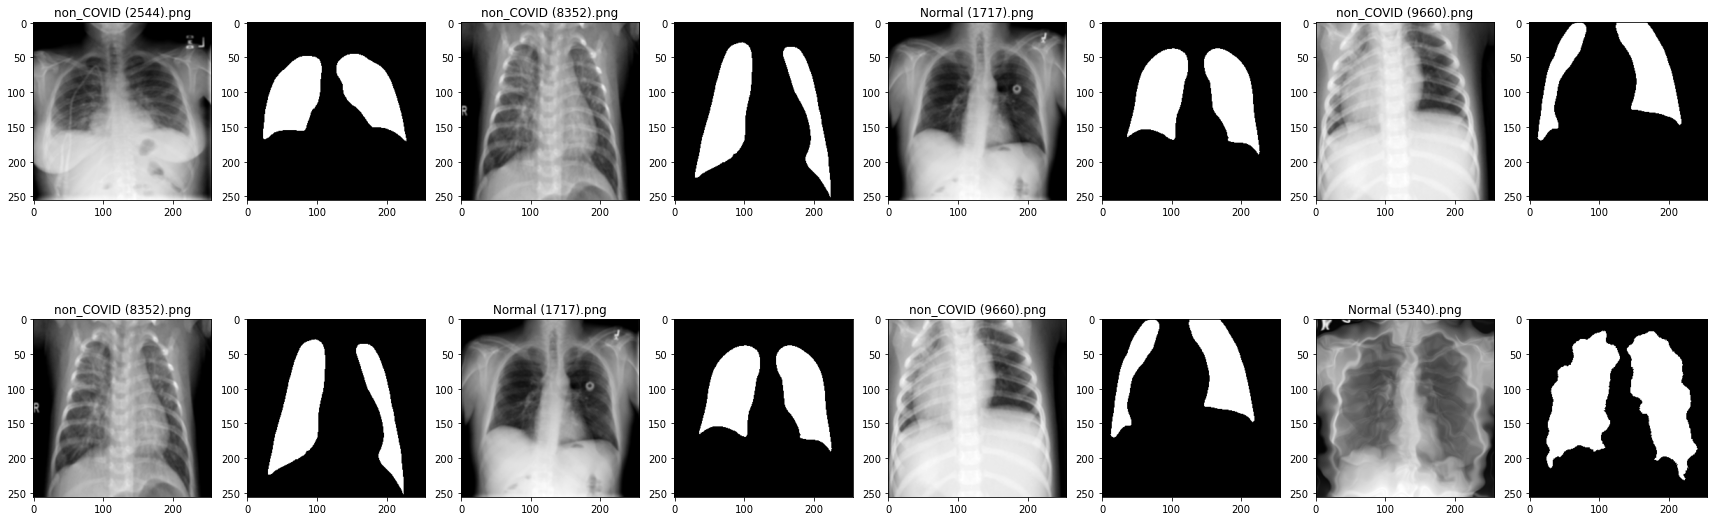

In [138]:
train_dataset = ImageDataset(train_csv, lung_data + 'Train', augs)
train_dataloader = DataLoader(train_dataset, batch_size = 8, shuffle=True)
img, mask, label, file_name = next(iter(train_dataloader))
img, mask = img_de_normalize(img, mask)
# imshow_img_mask(img,mask,label)
imshow_img_mask(img, mask, file_name)

In [16]:

transfms_M_STD = A.Compose([
    A.Resize(256,256),
    A.Normalize(mean = [0.], std =[1.]), # scale pixel values from [0,255] to [0,1]
    ToTensorV2() 
])

train_dt = ImageDataset(train_csv, lung_data+ 'Train', transfms_M_STD)
train_loader = DataLoader(train_dt, batch_size=32, shuffle = False)
img, _, _, _  = next(iter(train_loader))
print(img.size())    

torch.Size([32, 1, 256, 256])


In [17]:
def compute_mean_std(dataloader):
    mean1 = 0.
    std1 = 0.
    nb_samples = 0.
    for data, _, _, _ in tqdm(dataloader):
        batch_samples = data.size(0)

        # Rearrange data to be the shape of [B, C, W * H]
        data = data.view(batch_samples, data.size(1), -1) # torch.Size([32, 1, 65536])
        
        # Compute mean and std here
        mean1 += data.mean(2).sum(0) #tinh mean theo width*height va lay tong theo batch_size
        # print(data.mean(2).size())
        std1 += data.std(2).sum(0)

        # Update total number of images
        nb_samples += batch_samples
    mean1 /= nb_samples
    std1 /= nb_samples

    return mean1, std1

mean, std = compute_mean_std(train_loader)
print(mean, std)

100%|██████████| 679/679 [00:31<00:00, 21.64it/s]

tensor([0.5128]) tensor([0.2220])


In [18]:
# import os
# import torch

# from tqdm.notebook import tqdm
# from time import time
 
# N_CHANNELS = 1
 
# train_dataset = ImageDataset(train_csv, lung_data + 'Train', augs)
# train_dataloader = DataLoader(train_dataset, batch_size = 8, shuffle=True)
 
# before = time()
# mean = torch.zeros(1)
# std = torch.zeros(1)
# print('==> Computing mean and std..')
# for inputs, _labels, _, _ in tqdm(train_dataloader):
#     for i in range(N_CHANNELS):
#         mean[i] += inputs[:,i,:,:].mean()
#         std[i] += inputs[:,i,:,:].std()
# mean.div_(len(train_dataset))
# std.div_(len(train_dataset))
# print(mean, std)
 
# print("time elapsed: ", time()-before)